In [6]:
#imports
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider(token='Fo7uOZpoqAFaJyBUR9SzICGyoI1jqwXH')
import numpy as np

from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.extensions import UnitaryGate

First, we create the superposition of all the possible input states. We also put the ancilla into the |-> state, so we can apply the phase kick back trick.

In [7]:

BV=QuantumCircuit(4,3)
BV.h(0)
BV.h(1)
BV.h(2)
BV.h(3)
BV.z(3)
BV.barrier()
BV.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_3: ┤ H ├┤ Z ├─░─
     └───┘└───┘ ░ 
c: 3/═════════════

Next we implement the oracle. As mentioned in the lecture, the oracle will be implemented using CNOT gates.

In [8]:
BV.cx(0,3)
BV.barrier()
BV.draw()

┌───┐      ░       ░ 
q_0: ┤ H ├──────░───■───░─
     ├───┤      ░   │   ░ 
q_1: ┤ H ├──────░───┼───░─
     ├───┤      ░   │   ░ 
q_2: ┤ H ├──────░───┼───░─
     ├───┤┌───┐ ░ ┌─┴─┐ ░ 
q_3: ┤ H ├┤ Z ├─░─┤ X ├─░─
     └───┘└───┘ ░ └───┘ ░ 
c: 3/═════════════════════

Because of the phase kickback, the input superposition gain phase according to the value of x (innerproduct) s. We can then use a layer of Hadamard gate to retrive s.

In [9]:
BV.h(0)
BV.h(1)
BV.h(2)
BV.measure(0,0)
BV.measure(1,1)
BV.measure(2,2)
BV.draw()

┌───┐      ░       ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├──────
     ├───┤      ░   │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘ ░       ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2

Now we simulate the circuit and show that we retrive s from the input register with 100% probability (deterministically).

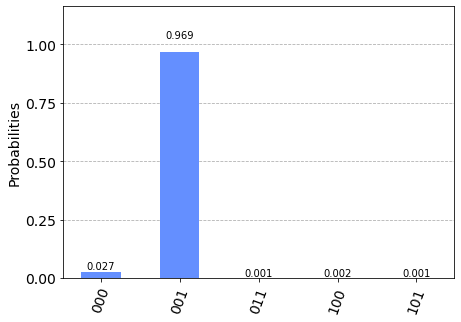

In [10]:
backend = ionq_provider.get_backend("ionq_qpu")#choose your backend
job = execute(BV, backend,shots=5000) #get the job object

# check if job is complete
from qiskit.providers.jobstatus import JobStatus
import time
# while job.status() is not JobStatus.Done():
#     print('Job status is ', job.status())
#     time.sleep(30)
    
result = job.result() # get result object
counts = result.get_counts() #get the counts dictionary
fig=plot_histogram(counts) #plot the histogram of the counts    
ax = fig.axes[0]
fig 